<a href="https://colab.research.google.com/github/caiobellezi/estudos/blob/master/Estudos_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear, Ridge e Lasso


Realiza uma análise comparativa entre a Regressão Linear, o Ridge e o Lasso no Boston Housing Dataset.

Baseado no livro: Andreas C. Müller, Sarah Guido (2016)
*Introduction to Machine Learning with Python: A Guide for Data Scientists 1st Edition*.

Exercicio proposto pelo:
Prof. Hugo de Paula - PUC Minas

-------------------------------------------------------------------------------

### Base de dados: Boston Housing dataset

http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

506 registros

14 atributos





























## Importar as bibliotecas e carregar dataset

In [30]:
#importando as bibliotecas
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
X = boston.data
print("Dimensoes originais",X.shape)

# O PolynomialFeaures() aumenta a dimensão dos dados produzindo novos atributos 
# que são combinações lineares dos dados originais.

X = MinMaxScaler().fit_transform(boston.data)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print("Polynomial Features (atributos redundantes):", X.shape)

y = boston.target

Dimensoes originais (506, 13)
Polynomial Features (atributos redundantes): (506, 104)


### Regressão Linear


Os passos para indução de um modelo são:

1.   Instanciar o modelo: ``` LinearRegression()```
2.   Treinar o modelo: ```fit()```

O método ```score()``` retorna o coeficiente R² de predição.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

lr = LinearRegression().fit(X_train, y_train)

print("Regressao Linear (com atributos redundantes)")
print("Acurácia (treino): {:.2f}".format(lr.score(X_train, y_train)))
print("Acurácia (teste): {:.2f}".format(lr.score(X_test, y_test)))

Regressao Linear (com atributos redundantes)
Acurácia (treino): 0.95
Acurácia (teste): 0.61



### Ridge (Regressão linear com regularização L2)

Força uma redução do valor dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância do sinal.

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1.

In [32]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge alpha: 1")
print("Acurácia (treino):  {:.2f}".format(ridge.score(X_train, y_train)))
print("Acururácia (teste): {:.2f}".format(ridge.score(X_test, y_test)))


ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("\nRidge alpha: 10")
print("Acurácia (treino):  {:.2f}".format(ridge10.score(X_train, y_train)))
print("Acururácia (teste): {:.2f}".format(ridge10.score(X_test, y_test)))



ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("\nRidge alpha: 0.1")
print("Acurácia (treino):  {:.2f}".format(ridge01.score(X_train, y_train)))
print("Acururácia (teste): {:.2f}".format(ridge01.score(X_test, y_test)))

Ridge alpha: 1
Acurácia (treino):  0.89
Acururácia (teste): 0.75

Ridge alpha: 10
Acurácia (treino):  0.79
Acururácia (teste): 0.64

Ridge alpha: 0.1
Acurácia (treino):  0.93
Acururácia (teste): 0.77


### Comparação da Regressão linear e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método. Pode-se observar como a regularização afeta a magnitude dos coeficientes do Ridge como um todo, mas sem zerar coeficientes de uma forma geral.

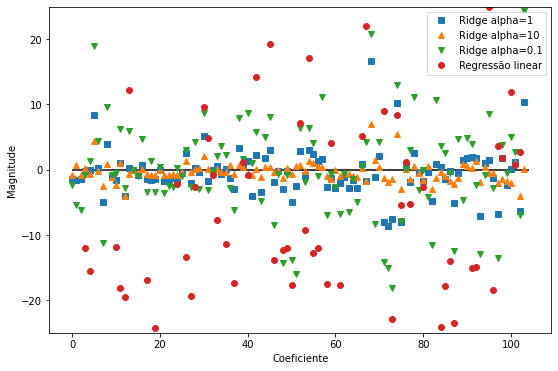

In [33]:
plt.figure(figsize=(9, 6))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Regressão linear")
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


### LASSO (Regressão linear com regularização L1)

Força uma redução do valor dos coeficientes, podendo zerar diversos coeficientes cujos atributos não contribuem significativamente para a previsão. Muito utilizado no apoio à tarefa de seleção de atributos (*feature selection*).

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1. ```Alpha=0``` resulta na regressão linear tradicional.

In [42]:
lasso = Lasso().fit(X_train, y_train)
print("Lasso alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("\nLasso alpha=.01")
print("Acurácia na base de treinamento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso001.coef_ != 0)))


lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("\nLasso alpha=.0001")
print("Acurácia na base de treinamento: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso00001.coef_ != 0)))

Lasso alpha=1
Acurácia na base de treinamento: 0.29
Acurácia na base de teste: 0.21
Número de atributos usados: 4

Lasso alpha=.01
Acurácia na base de treinamento: 0.90
Acurácia na base de teste: 0.77
Número de atributos usados: 33

Lasso alpha=.0001
Acurácia na base de treinamento: 0.95
Acurácia na base de teste: 0.64
Número de atributos usados: 96


### Comparação da LASSO e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método.

Text(0, 0.5, 'Magnitude')

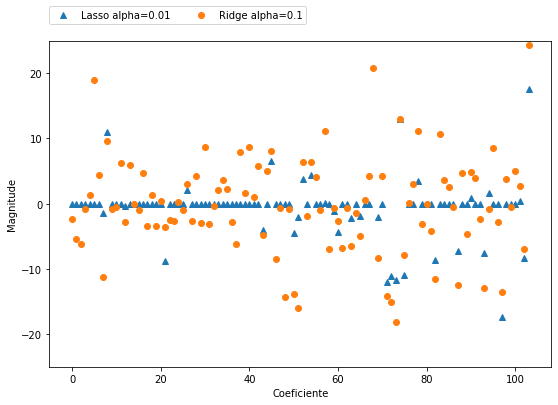

In [44]:
plt.figure(figsize=(9, 6))
#plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
#plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")